In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../raw_data/all_diets.csv')

In [3]:
print(df.shape)

(7806, 8)


In [4]:
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


In [5]:
df.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


In [6]:
df.dtypes

Diet_type           object
Recipe_name         object
Cuisine_type        object
Protein(g)         float64
Carbs(g)           float64
Fat(g)             float64
Extraction_day      object
Extraction_time     object
dtype: object

In [7]:
df.isnull().value_counts() 

Diet_type  Recipe_name  Cuisine_type  Protein(g)  Carbs(g)  Fat(g)  Extraction_day  Extraction_time
False      False        False         False       False     False   False           False              7806
dtype: int64

In [8]:
df['Diet_type'].value_counts()

mediterranean    1753
dash             1745
vegan            1522
keto             1512
paleo            1274
Name: Diet_type, dtype: int64

In [9]:
df[df['Fat(g)'] == 0]

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
4283,keto,Aunt Rocky’s Colored Sprinkles (Sugar Free),american,0.00,12.00,0.0,2022-10-16,18:09:18
4299,keto,Aunt Rocky’s Colored Sprinkles (Sugar Free),american,0.00,12.00,0.0,2022-10-16,18:09:25
6065,dash,Three Dots And A Dash,american,0.51,139.67,0.0,2022-10-16,20:29:20
6066,dash,Brooklyn Cocktail recipes,world,0.02,1.06,0.0,2022-10-16,20:29:20
6077,dash,Sazerac,world,0.00,4.87,0.0,2022-10-16,20:29:20
6088,dash,The Ginger Side,world,0.03,5.49,0.0,2022-10-16,20:29:27
6100,dash,The Ginger Side,world,0.03,5.49,0.0,2022-10-16,20:29:33
6107,dash,Bourbon Old Fashioned Recipe,british,0.00,10.42,0.0,2022-10-16,20:29:33
6127,dash,Screwdriver Recipe,world,0.00,0.07,0.0,2022-10-16,20:29:40
6161,dash,The Manchester,world,0.00,10.42,0.0,2022-10-16,20:29:53


In [16]:
fat = df.sort_values('Fat(g)', ascending = False)
fat.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
2265,vegan,Smoky Potato and Caper Empanadas With Cilantro...,south american,48.15,374.31,1930.24,2022-10-16,20:09:56
621,paleo,Paleo Blondies,american,109.85,1343.97,1869.58,2022-10-16,17:25:20
6312,dash,Shrimp Po Boy Sandwich Recipe,american,153.25,280.77,1860.20,2022-10-16,20:30:56
2142,vegan,Crispy Bánh Mì Spring Rolls With Creamy Chili ...,american,12.93,389.90,1831.34,2022-10-16,20:09:03
105,paleo,Swiss Paleo’s Homemade Italian & Chorizo Sausage,italian,1273.61,83.34,1608.54,2022-10-16,17:21:11
1238,paleo,Paleo Greek Roasted Lamb,mediterranean,115.42,15.53,1305.07,2022-10-16,17:31:04
7493,dash,Tomato Bon Bons,american,187.36,261.50,1180.89,2022-10-16,20:38:47
4231,keto,"Low Carb Beef and Cheddar Cauliflower Bake, TH...",british,710.81,112.56,1154.61,2022-10-16,18:08:58
923,paleo,Paleo Pita Crisps,mediterranean,52.77,543.93,1094.53,2022-10-16,17:28:19
5179,mediterranean,Chicken Thighs Confit,mediterranean,226.06,20.76,1092.92,2022-10-16,16:48:18


In [17]:
carbs = df.sort_values('Carbs(g)', ascending = False)
carbs.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
5420,mediterranean,Mediterranean Pizza,italian,628.29,3405.55,333.76,2022-10-16,16:49:45
1466,vegan,Summer Baked Beans recipes,american,12.72,3204.43,53.92,2022-10-16,20:03:50
7092,dash,Gluten-Free Roasted Vegetable Lasagna Recipe,italian,403.63,2772.11,274.51,2022-10-16,20:36:12
7757,dash,Cinnamon Rolls,nordic,163.98,2450.17,709.82,2022-10-16,20:40:30
1850,vegan,Strawberry Kiwi Daiquiri Cupcakes with Kiwi Cu...,american,92.28,2314.02,665.20,2022-10-16,20:06:52
467,paleo,"Pad Thai Recipe (Grain-Free, Paleo, Gluten Free)",south east asian,496.20,2023.05,211.10,2022-10-16,17:24:00
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80,2022-10-16,17:20:09
325,paleo,Paleo Chocolate Sweet Potato Bread (gluten and...,american,77.32,1801.16,887.91,2022-10-16,17:22:52
4461,mediterranean,Mediterranean Catfish Spaghetti,mediterranean,342.11,1796.28,42.97,2022-10-16,16:44:03
2495,vegan,Mini nut roasts with candied carrots,american,421.72,1636.67,267.25,2022-10-16,20:11:32


In [22]:
protein = df.sort_values('Protein(g)', ascending = False)
protein.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
105,paleo,Swiss Paleo’s Homemade Italian & Chorizo Sausage,italian,1273.61,83.34,1608.54,2022-10-16,17:21:11
7448,dash,Salmon Mousse,nordic,1239.47,22.40,983.36,2022-10-16,20:38:27
7741,dash,Homemade Turkey Alphabet Soup,american,1190.35,49.13,297.45,2022-10-16,20:40:24
496,paleo,Turkey Soup,american,1142.58,693.64,287.86,2022-10-16,17:24:13
3893,keto,Sara Louise's Keto Smoked Holiday Turkey,american,1092.00,49.28,313.81,2022-10-16,18:06:27
7191,dash,Barbecue Chicken Legs,mediterranean,1017.25,241.93,1002.07,2022-10-16,20:36:46
5066,mediterranean,Fava Bean Salad with Mountain Ham and Mint,american,970.31,823.34,322.84,2022-10-16,16:47:37
7177,dash,12th Man Hot Wings,american,807.03,49.17,649.49,2022-10-16,20:36:46
4002,keto,"Mayo Free Deviled Eggs (Paleo, Whole30 + Keto)",italian,766.99,41.29,287.59,2022-10-16,18:07:10
4231,keto,"Low Carb Beef and Cheddar Cauliflower Bake, TH...",british,710.81,112.56,1154.61,2022-10-16,18:08:58


In [23]:
df['Extraction_day'].value_counts()

2022-10-16    7806
Name: Extraction_day, dtype: int64

In [25]:
columns = ['Diet_type', 'Recipe_name', 'Cuisine_type', 'Protein(g)', 'Carbs(g)',
       'Fat(g)']
df = df[columns]
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


In [30]:
col = {"Protein(g)":'protein',
      'Carbs(g)':'carbs',
      'Fat(g)':'fat'}
df.rename(columns=col, inplace=True)
df.head()

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


Create Calorie Column

In [34]:
df['calories'] = df.apply(lambda row: row.protein*4+row.carbs*4+row.fat*9, axis=1)
df.head()

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2155.94
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2204.84
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63


Binning fat, protein, and carbs by label

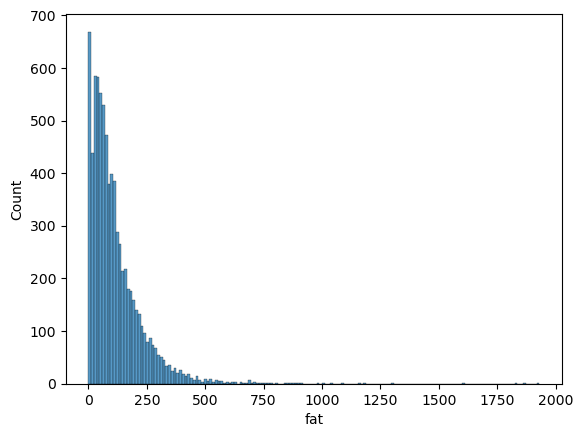

In [37]:
sns.histplot(data=df, x='fat')
plt.show()

In [38]:
'''
df['Grade'] = np.select(
    [df['Balance'] > 26,
     df['Balance'] <= 10,
     df['Balance'].between(11, 15),
     df['Balance'].between(16, 25)],
    ['Unsat', 'Excellent', 'Good', 'Moderate'],
    np.nan
)
'''
df['fat_con'] = np.select(
    [df['fat']<30,
     df['fat'].between(31,60),
     df['fat']>60],
    ['Low','Moderate','High'])
df.head()

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84,Low
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2155.94,High
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2204.84,High
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61,Moderate
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63,High


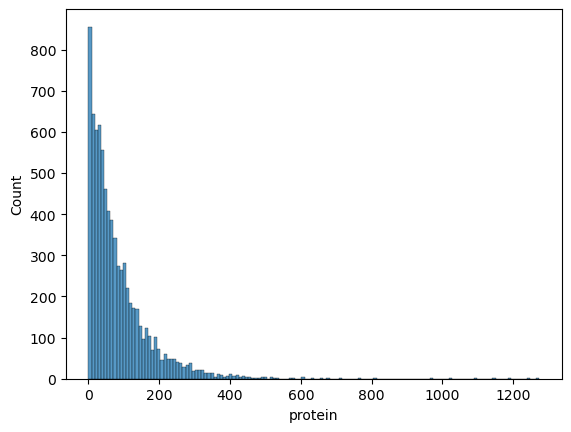

In [39]:
sns.histplot(data=df, x='protein')
plt.show()

In [41]:
df['protein_con'] = np.select(
    [df['protein']<10,
     df['protein'].between(10,40),
     df['protein']>40],
    ['Low','Moderate','High'])
df.head()

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con,protein_con
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84,Low,Low
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2155.94,High,High
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2204.84,High,Moderate
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61,Moderate,Low
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63,High,Moderate


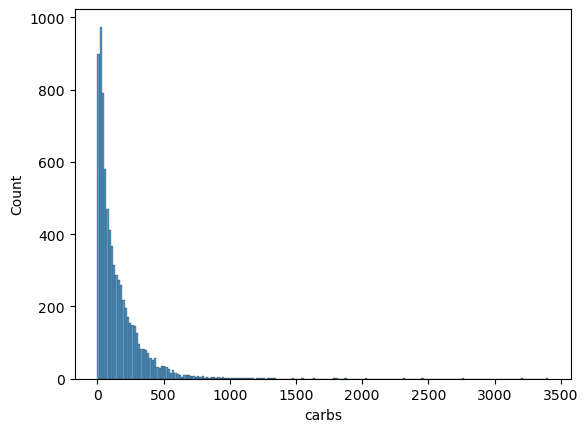

In [42]:
sns.histplot(data=df, x='carbs')
plt.show()

In [43]:
df['carbs_con'] = np.select(
    [df['carbs']<30,
     df['carbs'].between(30,80),
     df['carbs']>80],
    ['Low','Moderate','High'])
df.head()

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con,protein_con,carbs_con
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84,Low,Low,Low
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2155.94,High,High,Low
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2204.84,High,Moderate,High
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61,Moderate,Low,Moderate
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63,High,Moderate,Moderate


In [44]:
df.to_csv('../data/dietfood.csv', index=False)